In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/workspaces/Data-Analyst-Project-Portfolio/Netflix-WatchPattern-Analytics/data/netflix_cleaned.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Watch_Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df['DateOnly'] = df['Date'].dt.date

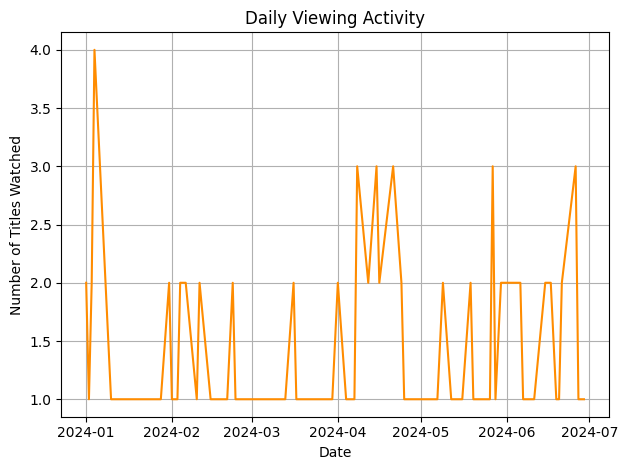

In [5]:
daily_views = df.groupby('DateOnly').size()

daily_views.plot(kind='line', linewidth=1.5, color='darkorange')
plt.title("Daily Viewing Activity")
plt.xlabel("Date")
plt.ylabel("Number of Titles Watched")
plt.tight_layout()
plt.grid(True)
plt.show()